In [2]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import os
import logging

In [3]:
## Setup chrome options
chrome_options = Options()
chrome_options.add_argument("--headless") # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")

# Silent download of drivers
logging.getLogger('WDM').setLevel(logging.NOTSET)
os.environ['WDM_LOG'] = 'False'

# Create service
webdriver_service = Service(ChromeDriverManager().install())

# Create Driver
driver = webdriver.Chrome(service = webdriver_service, options = chrome_options)

# Go to the characters in books page
url = 'https://witcher.fandom.com/wiki/Category:Characters_in_the_stories'
driver.get(url)

# CLick on Accept cookies
#time.sleep(3)
#driver.find_element(By.XPATH, "  ")

# Find Catogeries
book_categories = driver.find_elements(by=By.CLASS_NAME, value = 'category-page__member-link')

books = []

for category in book_categories :
    book_url= category.get_attribute('href')
    book_name =category.text
    books.append({'book_name': book_name, 'url':book_url})
    


In [4]:
books[:5]


[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'}]

In [5]:
character_names = []

for book in books:
    # Go to character page
    driver.get(book['url'])
    
    characters_elems = driver.find_elements(by = By.CLASS_NAME, value = 'category-page__member-link')
    
    for elem in characters_elems:
        character_names.append({'book':book['book_name'], 'character': elem.text})
        


In [6]:
character_names[:5]


[{'book': 'Category:Baptism of Fire characters', 'character': 'Adalia'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Adela'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aen Saevherne'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aevenien'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aglaïs'}]

In [7]:
df =pd.DataFrame(character_names)


In [8]:
df.tail


<bound method NDFrame.tail of                                       book               character
0      Category:Baptism of Fire characters                  Adalia
1      Category:Baptism of Fire characters                   Adela
2      Category:Baptism of Fire characters           Aen Saevherne
3      Category:Baptism of Fire characters                Aevenien
4      Category:Baptism of Fire characters                  Aglaïs
...                                    ...                     ...
1271  Category:Time of Contempt characters        Yanna of Murivel
1272  Category:Time of Contempt characters           Yarpen Zigrin
1273  Category:Time of Contempt characters  Yennefer of Vengerberg
1274  Category:Time of Contempt characters         Yiolenta Suarez
1275  Category:Time of Contempt characters                   Zyvik

[1276 rows x 2 columns]>

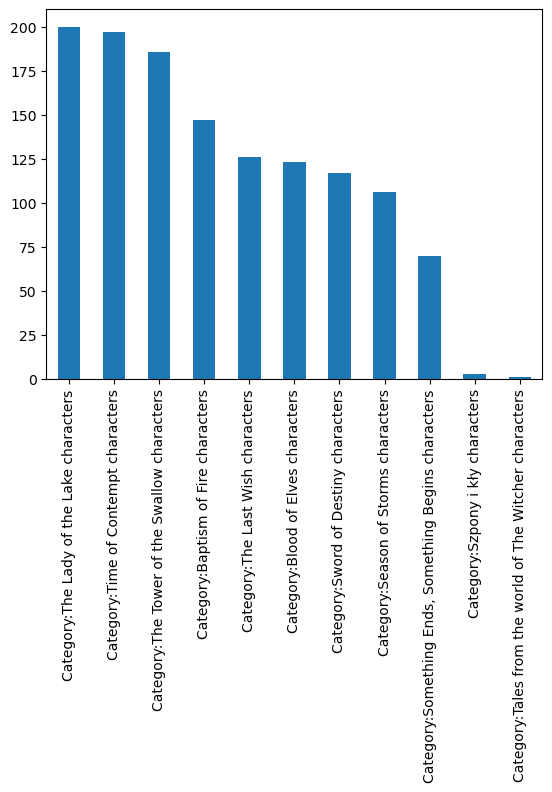

In [9]:
character_df = pd.DataFrame(character_names)

character_df['book'].value_counts().plot(kind="bar")
plt.show()

In [16]:
character_df.to_csv(r'C:\Users\erand\Documents\Projects\witcher 3\character list.csv', index = False)
